In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 15, 10
rcParams["font.weight"] = "bold"
rcParams["axes.labelweight"] = "bold"
rcParams["font.size"] = 12

In [3]:
df_placas = pd.read_csv('placas_solares.csv')

df_placas

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [4]:
df_placas.isna().sum() # Verificando los valores nulos

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [5]:
df_placas.info() # Verificando los tipos de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


In [6]:
df_placas["MODULE_TEMPERATURE"].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
3177    False
3178    False
3179    False
3180    False
3181    False
Name: MODULE_TEMPERATURE, Length: 3182, dtype: bool

In [7]:
df_placas["MODULE_TEMPERATURE"].isna().sum()

0

In [8]:
df_placas["MODULE_TEMPERATURE"][df_placas["MODULE_TEMPERATURE"].isna()]

Series([], Name: MODULE_TEMPERATURE, dtype: float64)

In [9]:
df_placas[20:330][["MODULE_TEMPERATURE", "AMBIENT_TEMPERATURE", "IRRADIATION"]]

,MODULE_TEMPERATURE,AMBIENT_TEMPERATURE,IRRADIATION
20,22.551908,24.177106,0.000000
21,22.979492,24.304888,0.000000
22,23.452380,24.328727,0.000000
23,23.096692,24.289211,0.000863
24,22.206757,24.088446,0.005887
...,...,...,...
325,41.369017,25.706631,0.562313
326,46.148806,26.310502,0.603215
327,45.970447,26.840597,0.593244
328,44.061045,26.932355,0.551130


In [10]:
df_placas.drop(df_placas.dropna().index)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION


In [11]:
# No hay nada que limpiar

df_placas.shape[0] - 0

3182

In [12]:
df_solar_filt = df_placas.dropna().reset_index(drop=True)
df_solar_filt

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


### Análisis exploratorio, tratamiento y limpieza de datos


In [13]:
df_solar_filt.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000,3182.000000
mean,4135001.0,25.531606,31.091015,0.228313
std,0.0,3.354856,12.261222,0.300836
min,4135001.0,20.398505,18.140415,0.000000
25%,4135001.0,22.705182,21.090553,0.000000
50%,4135001.0,24.613814,24.618060,0.024653
75%,4135001.0,27.920532,41.307840,0.449588
max,4135001.0,35.252486,65.545714,1.221652


In [14]:
# consultar el tipo de datos
df_solar_filt.dtypes

DATE_TIME               object
PLANT_ID                 int64
SOURCE_KEY              object
AMBIENT_TEMPERATURE    float64
MODULE_TEMPERATURE     float64
IRRADIATION            float64
dtype: object

In [15]:
df_solar_filt.dtypes[df_solar_filt.dtypes == "object"]

DATE_TIME     object
SOURCE_KEY    object
dtype: object

In [16]:

df_solar_filt['DATE_TIME'].value_counts()

2020-05-15 00:00:00    1
2020-06-06 20:45:00    1
2020-06-06 21:15:00    1
2020-06-06 21:30:00    1
2020-06-06 21:45:00    1
                      ..
2020-05-26 17:45:00    1
2020-05-26 18:00:00    1
2020-05-26 18:15:00    1
2020-05-26 18:30:00    1
2020-06-17 23:45:00    1
Name: DATE_TIME, Length: 3182, dtype: int64

In [17]:
# columnas a eliminar por ser informativas
columnas_drop = ["DATE_TIME", "SOURCE_KEY"]

In [18]:
df_solar_filt2 = df_solar_filt.drop(columns = columnas_drop)
print("Tamaño del tablón filtrado: ", df_solar_filt.shape)
print("Tamaño del tablón nuevo: ", df_solar_filt2.shape)

Tamaño del tablón filtrado:  (3182, 6)
Tamaño del tablón nuevo:  (3182, 4)


In [19]:
df_solar_filt2.dtypes.value_counts()

float64    3
int64      1
dtype: int64

### Reducción de variables
Importancia de variables

In [20]:
# generar la lista de features y la variable target
target = 'MODULE_TEMPERATURE'
features = [x for x in df_solar_filt2.columns if x != target]

print(target)
print(features)

MODULE_TEMPERATURE
['PLANT_ID', 'AMBIENT_TEMPERATURE', 'IRRADIATION']


In [21]:
df_solar_filt2[target]

0       22.857507
1       22.761668
2       22.592306
3       22.360852
4       22.165423
          ...    
3177    21.480377
3178    21.389024
3179    20.709211
3180    20.734963
3181    20.427972
Name: MODULE_TEMPERATURE, Length: 3182, dtype: float64

In [22]:
# Importar el algoritmo de árboles de decisión
from sklearn.tree import DecisionTreeRegressor

# Asignar el algortimo e indicar la profundidad máxima del árbol (con un número rotandamente grande para sobreajustar)
arbol_importancia = DecisionTreeRegressor(max_depth=len(features)+10, random_state=42)

# Entrenar un árbol con todo el conjunto de datos
arbol_importancia.fit(X=df_solar_filt2[features], y=df_solar_filt2[target])

DecisionTreeRegressor(max_depth=13, random_state=42)

In [23]:
# Comprobamos que se obtiene un R^2 muy alto. Lo desesable es que sea 1.
y_pred_arbol = arbol_importancia.predict(X=df_solar_filt2[features])

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Métricas para evaluar la calidad del modelo
print('Mean Absolute Error:', mean_absolute_error(df_solar_filt2[target], y_pred_arbol))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_solar_filt2[target], y_pred_arbol)*100)
print('Mean Squared Error:', mean_squared_error(df_solar_filt2[target], y_pred_arbol))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_solar_filt2[target], y_pred_arbol)))
print('R^2 coefficient of determination:', r2_score(df_solar_filt2[target], y_pred_arbol))

Mean Absolute Error: 0.2913544437821614
Mean Absolute Percentage Error: 1.0937747350791314
Mean Squared Error: 0.2983069852067644
Root Mean Squared Error: 0.5461748668757694
R^2 coefficient of determination: 0.9980151282786599


In [24]:
# Importancia de cada variable en el árbol ajustado
arbol_importancia.feature_importances_

array([0.        , 0.06689697, 0.93310303])

In [25]:
# Crear un dataframe con los datos de importancia
importancia = pd.DataFrame(arbol_importancia.feature_importances_, index=features, columns=["Importancia"])

# Ordenamos los datos
importancia.sort_values(by=importancia.columns[0], ascending=False, inplace=True)
importancia

,Importancia
IRRADIATION,0.933103
AMBIENT_TEMPERATURE,0.066897
PLANT_ID,0.000000


In [26]:
importancia["imp_acum"] = importancia["Importancia"].cumsum()
importancia

,Importancia,imp_acum
IRRADIATION,0.933103,0.933103
AMBIENT_TEMPERATURE,0.066897,1.000000
PLANT_ID,0.000000,1.000000


In [27]:
# Conjunto de variables más importantes
importancia.loc[importancia['imp_acum']<=0.90]

,Importancia,imp_acum


In [28]:
variables = importancia.loc[importancia['imp_acum']>0.90].index.to_list()
print(variables)

['IRRADIATION', 'AMBIENT_TEMPERATURE', 'PLANT_ID']


Todas las variables tienen importancia, no eliminamos ninguna.

### Planteamiento del ejercicio de clasificación

# Hacemos una copia del tablón filtrado para no trabajar sobre original


In [29]:
# Hacemos una copia del tablón filtrado para no trabajar sobre original
df_solpl = df_solar_filt2.copy()

In [30]:
#Crearemos ahora una nueva columna llamada escenario
df_solpl["escenario"] = np.where(df_solpl["MODULE_TEMPERATURE"]<df_solpl["MODULE_TEMPERATURE"].mean(),"frio","calor")
df_solpl.drop(["MODULE_TEMPERATURE"],axis=1,inplace=True)
df_solpl

,PLANT_ID,AMBIENT_TEMPERATURE,IRRADIATION,escenario
0,4135001,25.184316,0.0,frio
1,4135001,25.084589,0.0,frio
2,4135001,24.935753,0.0,frio
3,4135001,24.846130,0.0,frio
4,4135001,24.621525,0.0,frio
...,...,...,...,...
3177,4135001,22.150570,0.0,frio
3178,4135001,22.129816,0.0,frio
3179,4135001,22.008275,0.0,frio
3180,4135001,21.969495,0.0,frio


In [31]:
df_solpl.describe()

,PLANT_ID,AMBIENT_TEMPERATURE,IRRADIATION
count,3182.0,3182.000000,3182.000000
mean,4135001.0,25.531606,0.228313
std,0.0,3.354856,0.300836
min,4135001.0,20.398505,0.000000
25%,4135001.0,22.705182,0.000000
50%,4135001.0,24.613814,0.024653
75%,4135001.0,27.920532,0.449588
max,4135001.0,35.252486,1.221652


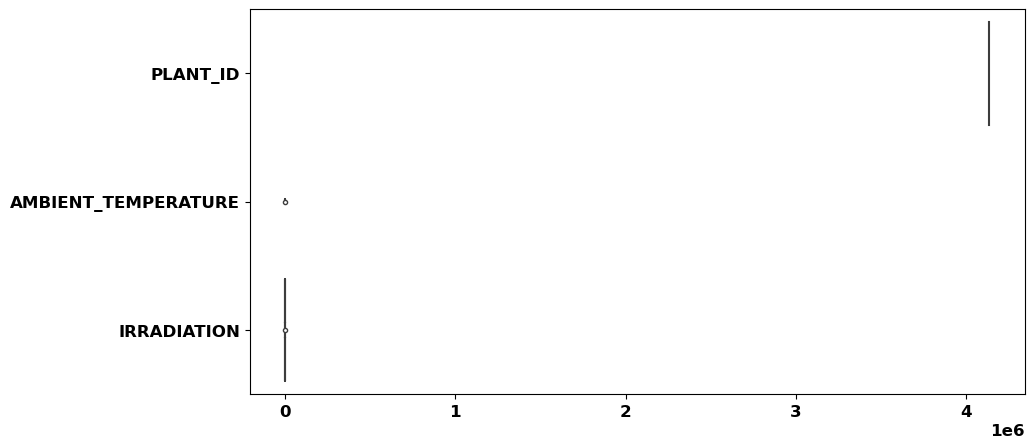

In [32]:
#graficar primer escenario
plt.figure(figsize=(10,5))
sns.violinplot(data=df_solpl, orient="h")
plt.show()

### **Paso 1.**  Obtención y preparación de datos

In [33]:
# preparar los datos del modelo
# Variables independientes
X = df_solpl.drop(["escenario"],axis= 'columns')
# Variable dependiente
y = df_solpl["escenario"]

In [34]:
# importamos libreria sklear
from sklearn.preprocessing import StandardScaler
# tipo de escalamiento y su ajuste
escalado = StandardScaler().fit(X)
dataset_normal = escalado.transform(X)
dataset_normal

array([[ 0.        , -0.10353476, -0.75904624],
       [ 0.        , -0.13326574, -0.75904624],
       [ 0.        , -0.17763708, -0.75904624],
       ...,
       [ 0.        , -1.05038344, -0.75904624],
       [ 0.        , -1.0619446 , -0.75904624],
       [ 0.        , -1.07989366, -0.75904624]])

In [35]:
# Lo convertimos en un DataFrame, añadiendole sus etiquetas
X_normal = pd.DataFrame(dataset_normal, columns=X.columns)
print(type(X_normal))
X_normal

<class 'pandas.core.frame.DataFrame'>


,PLANT_ID,AMBIENT_TEMPERATURE,IRRADIATION
0,0.0,-0.103535,-0.759046
1,0.0,-0.133266,-0.759046
2,0.0,-0.177637,-0.759046
3,0.0,-0.204355,-0.759046
4,0.0,-0.271315,-0.759046
...,...,...,...
3177,0.0,-1.007962,-0.759046
3178,0.0,-1.014149,-0.759046
3179,0.0,-1.050383,-0.759046
3180,0.0,-1.061945,-0.759046


In [36]:
X_normal.describe().round(4)

,PLANT_ID,AMBIENT_TEMPERATURE,IRRADIATION
count,3182.0,3182.0000,3182.0000
mean,0.0,-0.0000,-0.0000
std,0.0,1.0002,1.0002
min,0.0,-1.5303,-0.7590
25%,0.0,-0.8426,-0.7590
50%,0.0,-0.2736,-0.6771
75%,0.0,0.7122,0.7357
max,0.0,2.8980,3.3024


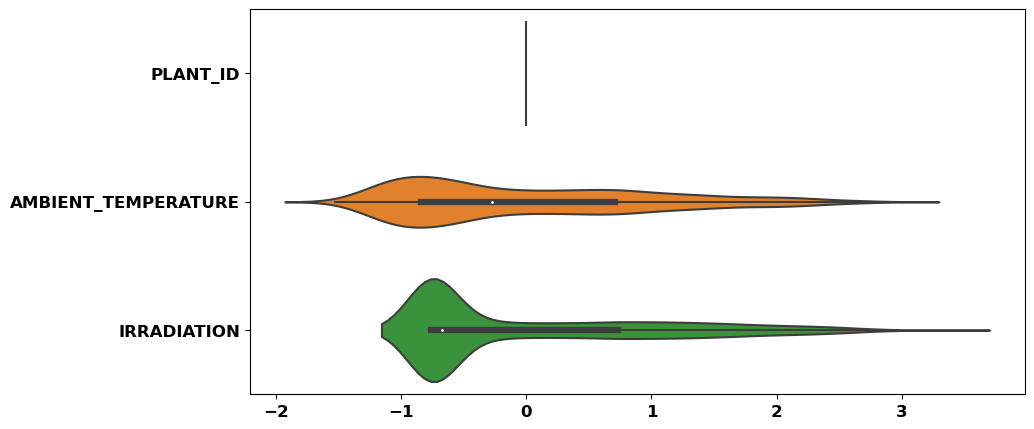

In [37]:
# Graficar la distribución de los valores estandarizados
plt.figure(figsize=(10,5))
sns.violinplot(data=X_normal, orient="h")
plt.show()

### **Paso 2.**  Dividir el dataset en Training y Test

In [38]:
# Separar los conjuntos de datos de entrenamiento (Training) y de prueba (Test) para las variables de entrada y salida
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.2, random_state=42)


In [39]:
# "test_size" representa la proporción del conjunto de datos a incluir en la división de Test
print(X_train.shape[0])
print(X_test.shape[0])
X_train.shape[0] + X_test.shape[0]

2545
637


3182

### **Paso 3.** Cargar y elegir el modelo de regresión logística

In [40]:
# Importar el módulo que corresponde al algoritmo
from sklearn.linear_model import LogisticRegression

# Asignar el algoritmo que vamos a aplicar 
log_r = LogisticRegression(max_iter= 1000, random_state=42)

### **Paso 4.** Entrenar el modelo de regresión logística con los datos de entrenamiento

In [41]:
# Entrenar el modelo
log_r.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

### **Paso 5.** Obtener las predicciones 

In [42]:
# Calcular las predicciones con el conjunto de prueba
y_pred = log_r.predict(X_test)

In [43]:
# Imprimir la salida del modelo (los niveles de calidad del aire)
print(y_pred)

['calor' 'calor' 'frio' 'calor' 'frio' 'frio' 'frio' 'calor' 'calor'
 'calor' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio'
 'calor' 'frio' 'frio' 'frio' 'frio' 'frio' 'calor' 'frio' 'frio' 'calor'
 'calor' 'frio' 'frio' 'calor' 'calor' 'calor' 'calor' 'calor' 'frio'
 'frio' 'frio' 'calor' 'frio' 'frio' 'calor' 'frio' 'frio' 'frio' 'frio'
 'calor' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'frio' 'calor'
 'calor' 'frio' 'frio' 'calor' 'calor' 'frio' 'frio' 'calor' 'calor'
 'calor' 'frio' 'frio' 'frio' 'frio' 'calor' 'frio' 'frio' 'frio' 'frio'
 'calor' 'frio' 'frio' 'frio' 'calor' 'calor' 'frio' 'frio' 'calor'
 'calor' 'frio' 'frio' 'frio' 'calor' 'calor' 'frio' 'frio' 'frio' 'calor'
 'calor' 'calor' 'frio' 'calor' 'frio' 'frio' 'frio' 'calor' 'frio' 'frio'
 'calor' 'frio' 'frio' 'frio' 'frio' 'frio' 'calor' 'calor' 'calor'
 'calor' 'frio' 'calor' 'frio' 'calor' 'frio' 'frio' 'calor' 'calor'
 'calor' 'frio' 'frio' 'frio' 'frio' 'frio' 'calor' 'frio' 'calor' 'frio

### **Paso 6.** Evaluación del modelo a través de sus métricas

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9874411302982732

Clasificacion report

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       calor       0.99      0.98      0.98       244
        frio       0.98      0.99      0.99       393

    accuracy                           0.99       637
   macro avg       0.99      0.99      0.99       637
weighted avg       0.99      0.99      0.99       637



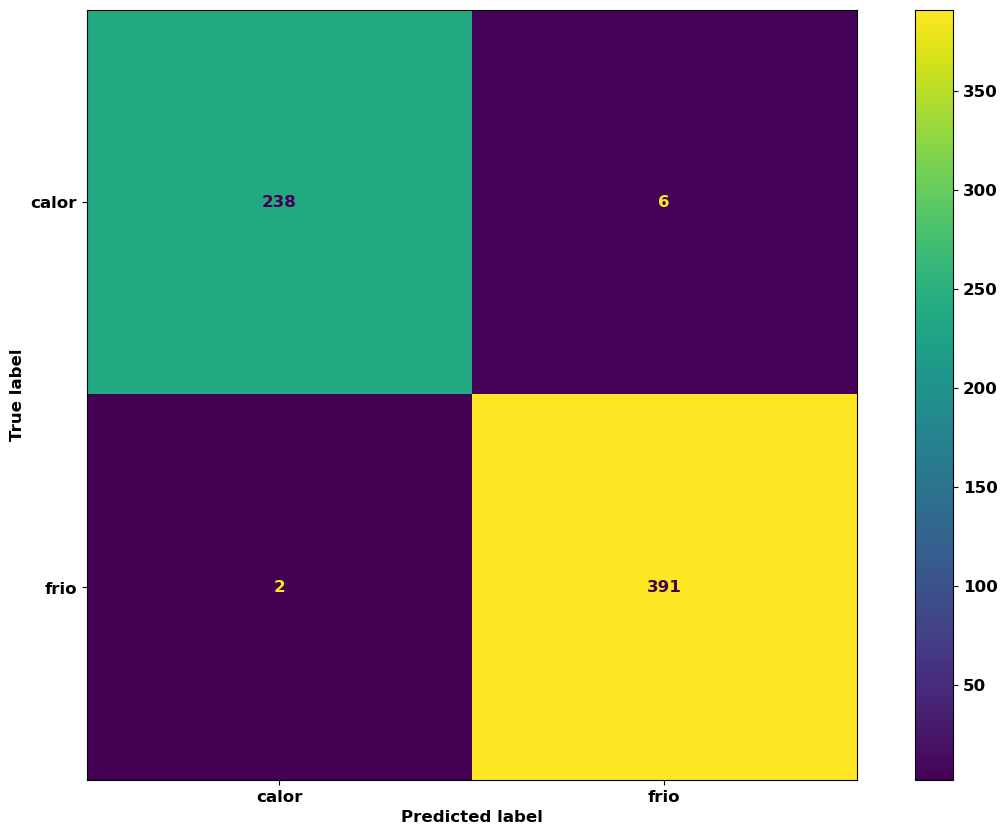

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred),
                               display_labels=log_r.classes_)
disp.plot()

plt.show()

In [47]:
# Calculo del area bajo la curva ROC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

ValueError: could not convert string to float: 'calor'

In [ ]:
# Curva ROC
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_test, y_pred)

plt.show()